In [ ]:
pip install mlxtend --upgrade --no-deps


     |████████████████████████████████| 1.3 MB 8.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv


In [ ]:
projectData=[]
with open('chess.dat') as f:
    dataset = csv.reader(f, delimiter=' ')
    for row in dataset:
        projectData.append([element for element in row][:-1])

# New Section

# New Section

In [ ]:
fpTimes = list()
fpElements = list()
minSupport = .6
minSupportIncVal = 0.05
while minSupport <=1:
  fpStart = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(projectData).transform(projectData)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support= minSupport, use_colnames=True)
  fpEnd = time.process_time()

  #push data
  fpElements.append(minSupport)
  fpTimes.append(fpEnd-fpStart)

  #print (result)
  # total time taken
  print(f"Runtime of the program is {minSupport*100} {fpEnd - fpStart}")
  minSupport += minSupportIncVal

Runtime of the program is 60.0 6.313887603000005
Runtime of the program is 65.0 2.866370271000001
Runtime of the program is 70.0 1.3750172280000044
Runtime of the program is 75.00000000000001 0.5583725749999999
Runtime of the program is 80.00000000000001 0.2811343500000021
Runtime of the program is 85.00000000000001 0.23091368000000045
Runtime of the program is 90.00000000000003 0.10718757100000431
Runtime of the program is 95.00000000000003 0.08776315000000068


In [ ]:
apTimes = list()
apElements = list()
minSupport = .6
minSupportIncVal = 0.05
while minSupport <=1:
  apStart = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(projectData).transform(projectData)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= apriori(df, min_support= minSupport, use_colnames=True)
  apEnd = time.process_time()

  #push data
  apElements.append(minSupport)
  apTimes.append(apEnd-apStart)

  print(f"Runtime of the program is {minSupport*100} {apEnd - apStart}")

  #sum min support incremental value
  minSupport += minSupportIncVal

  #print (result)
  # total time taken
  
  

Runtime of the program is 60.0 32.64737150000002
Runtime of the program is 65.0 12.802712767000031
Runtime of the program is 70.0 5.349754648000044
Runtime of the program is 75.00000000000001 1.7333375680000245
Runtime of the program is 80.00000000000001 0.8795160739999801
Runtime of the program is 85.00000000000001 0.31502603699999554
Runtime of the program is 90.00000000000003 0.08858099600001879
Runtime of the program is 95.00000000000003 0.04732486099999278


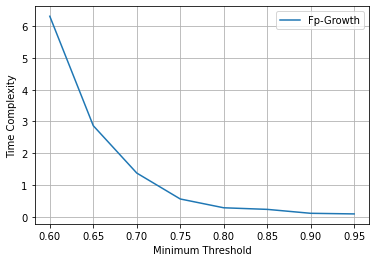

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpElements, fpTimes, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('AprioriChess.pdf',bbox_inches='tight')
plt.show()

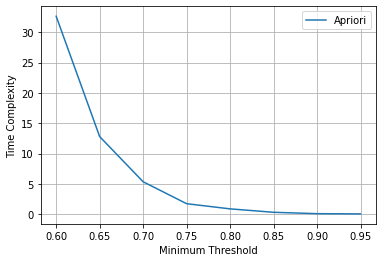

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apElements, apTimes, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('AprioriChess.pdf',bbox_inches='tight')
plt.show()

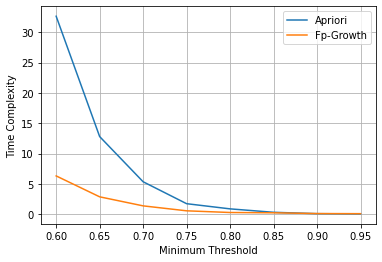

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apElements, apTimes, label ='Apriori')
plt.plot(fpElements, fpTimes, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('chesscombine.pdf',bbox_inches='tight')
plt.show()

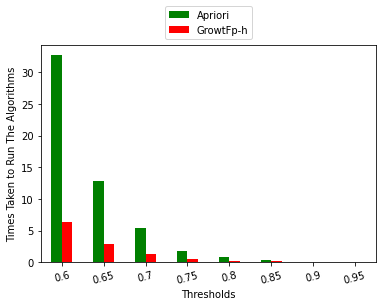

In [ ]:
data={"Apriori":apTimes,"GrowtFp-h":fpTimes}
index = [0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
dataFrame = pd.DataFrame(data=data, index=index)

 
my_colors = ['green','red']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run The Algorithms")
plt.xlabel("Thresholds")
plt.savefig('Chess.pdf',bbox_inches='tight')

plt.show(block=True);